In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [ ]:
# dataset is taken from "https://datahub.io/machine-learning/kddcup99#resource-kddcup99_zip"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("kddcup99.csv")
df.shape

(494020, 42)

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [6]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [27]:
# flattening the dataset 
df1 = df.drop(df.columns[[1, 2, 3]], axis=1)
df1.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,181,5450,0,0,0,0,0,1,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,239,486,0,0,0,0,0,1,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,235,1337,0,0,0,0,0,1,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,219,1337,0,0,0,0,0,1,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,217,2032,0,0,0,0,0,1,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [28]:
dat1 = pd.get_dummies(df['protocol_type'])
dat2 = pd.get_dummies(df['service'])
dat3 = pd.get_dummies(df['flag'])

In [29]:
p = dat1.join(dat2)
df2 = p.join(dat3)
dataset1 = df2.join(df1)
dataset = dataset1.head(50000)
dataset.head()
dataset.shape

(50000, 119)

In [30]:
#selecting the columns excluding lables
X = dataset.iloc[:, :-1].values


In [31]:
y = dataset.iloc[:, -1].values

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
#scaling by doing normalisation
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [59]:
X_train[0]

array([-0.52396068,  0.5645315 , -0.16426809,  0.        ,  0.        ,
        0.        , -0.03744279,  0.        ,  0.        ,  0.        ,
       -0.00500006, -0.00500006,  0.        , -0.00866058, -0.14708188,
        0.        , -0.06357095, -0.51771594,  0.        ,  0.        ,
       -0.05754065, -0.0548546 , -0.13832659, -0.00707124,  0.        ,
        0.70780959,  0.        , -0.00500006,  0.        ,  0.        ,
        0.        ,  0.        , -0.00707124, -0.00707124,  0.        ,
       -0.00500006,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.05665927, -0.020004  ,  0.        ,
        0.        , -0.02398605,  0.        , -0.0768747 ,  0.        ,
       -0.00500006, -0.00866058,  0.        , -0.24722569,  0.        ,
       -0.00707124,  0.        ,  0.        ,  0.        , -0.05056203,
        0.        ,  0.        , -0.00707124,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.00

In [34]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
k_range = list(range(1, 11))

In [57]:
param_grid = dict(n_neighbors=k_range)
param_grid

{'n_neighbors': 0     1
 1     2
 2     3
 3     4
 4     5
 5     6
 6     7
 7     8
 8     9
 9    10
 Name: param_n_neighbors, dtype: object}

In [37]:
knn = KNeighborsClassifier(n_neighbors=k_range)

In [38]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [39]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10]),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [40]:
data = grid.cv_results_

In [41]:
dfdf = pd.DataFrame.from_dict(data)

In [42]:
print(dfdf[['param_n_neighbors','mean_test_score']])

  param_n_neighbors  mean_test_score
0                 1         0.999125
1                 2         0.998975
2                 3         0.999000
3                 4         0.999025
4                 5         0.999000
5                 6         0.998900
6                 7         0.998850
7                 8         0.998850
8                 9         0.998700
9                10         0.998700


In [43]:
k_range = dfdf['param_n_neighbors']
scores = dfdf['mean_test_score']

best score 0.9991249999999999
best no of neighbours {'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
classifiaction report
              precision    recall  f1-score   support

        back       1.00      1.00      1.00       196
   ftp_write       0.50      1.00      0.67         1
guess_passwd       1.00      0.91      0.95        11
     ipsweep       0.96      1.00      0.98        52
        nmap       1.00      1.00      1.00        16
      normal       1.00      1.00      1.00      7553
         pod       1.00      1.00      1.00         4
   portsweep       1.00      1.00      1.00         6
       satan       0.00      0.00      0.00         0
       smurf       1.00      1.00      1.00      2138
    teardrop       1.00      1.00      1.00        23

    accuracy                           1.00     10000
   macro avg       0.86      0.90      0.87     10000
weighted avg       1.00      1.00      1.00     10000



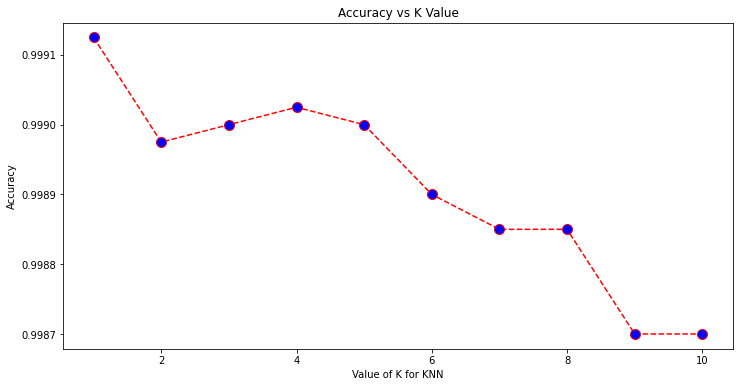

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
print('best score', grid.best_score_)
print('best no of neighbours', grid.best_params_)
print(grid.best_estimator_)
print('classifiaction report')
print(classification_report(grid.best_estimator_.predict(X_test), y_test))

In [46]:
from sklearn.svm import SVC
svm = SVC()


In [48]:
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(svm,param_grid,  cv=5, scoring='accuracy')

In [49]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [50]:
data = grid.cv_results_

In [51]:
df_svm = pd.DataFrame.from_dict(data)
df_svm.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [52]:
print(df_svm[['param_C','param_gamma','mean_test_score']])

  param_C param_gamma  mean_test_score
0     0.1           1         0.992800
1     0.1         0.1         0.996900
2     0.1        0.01         0.997475
3     0.1       0.001         0.976625
4     0.1      0.0001         0.969850
5       1           1         0.997075
6       1         0.1         0.998325
7       1        0.01         0.998600
8       1       0.001         0.998775
9       1      0.0001         0.977150


In [53]:
print('best score', grid.best_score_)
print('best no of neighbours', grid.best_params_)
print(grid.best_estimator_)
print('classifiaction report')
print(classification_report(grid.best_estimator_.predict(X_test), y_test))

best score 0.998775
best no of neighbours {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.001)
classifiaction report
              precision    recall  f1-score   support

        back       1.00      1.00      1.00       196
   ftp_write       0.00      0.00      0.00         0
guess_passwd       1.00      1.00      1.00        10
     ipsweep       0.89      1.00      0.94        48
        nmap       1.00      1.00      1.00        16
      normal       1.00      1.00      1.00      7559
         pod       1.00      1.00      1.00         4
   portsweep       1.00      1.00      1.00         6
       satan       0.00      0.00      0.00         0
       smurf       1.00      1.00      1.00      2138
    teardrop       1.00      1.00      1.00        23

    accuracy                           1.00     10000
   macro avg       0.81      0.82      0.81     10000
weighted avg       1.00      1.00      1.00     10000



In [55]:
y_predicted = grid.best_estimator_.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 196,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    2,    0,    0,    0,    0,    0],
       [   0,    0,   10,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,   48,    0,    6,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,   16,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 7550,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    4,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    6,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 2138,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   23]])

Text(69.0, 0.5, 'Truth')

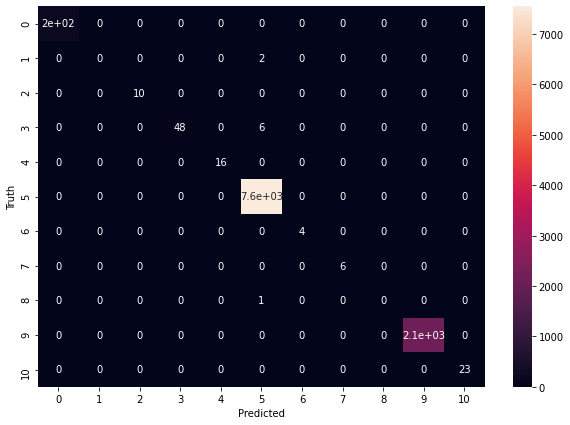

In [56]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')